#  Задание 1

1. Какие гипотезы называются простыми, а какие сложными?

    * Простая гипотеза - тестируется равенство наблюдаемой выборки одному распределению. Альтернатива этому - сложная гипотеза

2. Чем отличаются параметрические критерии от непараметрических? В каких ситуациях можно использовать параметрические критерии, а в каких лучше использовать непараметрические?

    * Параметрические методы - мы предполагаем, что выборка взята из параметрического распределения и в процессе тестирования оцениваем или используем параметры этого распределения. Для непараметрических критериев мы не делаем таких предположений.
    * Если есть возможность использовать параметрические критерии - доверительные интервалы по ним могут оказаться уже и помочь нам протестировать гипотезу с меньшим числом наблюдений на том же уровне $pvalue$. Когда у нас данные категариальные или мы не знаем, к какому распределению принадлежит выборка, то может быть необходимость использовать непараметрические критерии. Также, часть непараметрических критериев проще в реализации.

3. Что такое уровень значимости? А фактический уровень значимости?

    * Уровень значимости - вероятность отвергнуть нулевую гипотезу, при условии что она верна. Для доверительного интервала - если $\alpha$ = равно уровень значимости, то доверительный интервал, который мы строим на этом уровне значимости будет накрывать значение, для которого мы строим доверительный интервал с вероятностью $1-\alpha$
    * фактический уровень значимости - pvalue. Это вероятность для верной нулевой гипотезы $H0$ получить
значение статистики равное или более экстремальное, тому, что мы посчитали по выборке

4. С помощью каких критериев можно проверить нормальность выборки?

    * Визуально по графику $Q-Q$
    * Критерий Колмогорова-Смирнова, оценив параметры нормального распределения по выборке и сравнив с выборочной функцией распределения
    * Шапиро-Уилка
    * Харке-Бера
    * Хи-квадрат, развив данные на бакеты

5. Что такое ранг наблюдения? Когда предпочтительнее использовать ранговые критерии?

    * Ранг наблюдения - номер наблюдения в вариационном ряде (упорядоченные наблюдения из выборки).
    * Ранговые критерии использовать более корректно, когда оценивается монотонная, но нелинейная зависимость между двумя случайными величинами.



# Задание 2
Для данных из файла employees.xls постройте гистограмму для переменной SALARY. Похоже ли распределение зарплат на нормальный закон? Проверьте нормальность
с помощью изученных критериев

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import chisquare
import scipy
from scipy import stats
from statsmodels.stats.weightstats import *
import matplotlib.pyplot as plt
from scipy.stats import norm
from statsmodels.stats.descriptivestats import sign_test

from sklearn.ensemble import RandomForestRegressor

<AxesSubplot:>

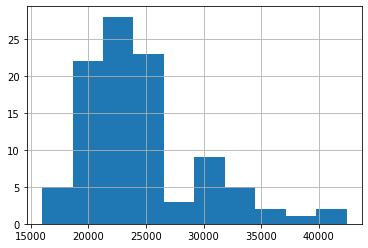

In [2]:
employees = pd.read_excel('data/employees.xls')
employees.SALARY.hist()

не очень нормальное

qq

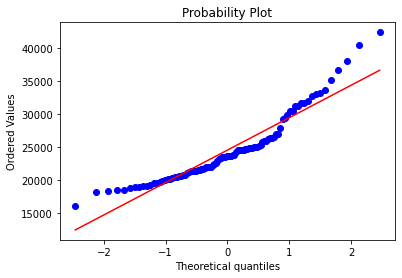

In [3]:
f = stats.probplot(employees.SALARY, dist="norm", plot = plt)

In [4]:
intervals = np.linspace(min(employees.SALARY), max(employees.SALARY),31)
expected = []
observed = []
std = np.std(employees.SALARY)
mu = np.mean(employees.SALARY)
for i in range(1,len(intervals)):
    observed.append(len(employees.SALARY[(employees.SALARY < intervals[i]) & (employees.SALARY >= intervals[i-1])]))
    expected.append((norm.cdf(intervals[i], mu, std) - norm.cdf(intervals[i-1], mu, std))*len(employees.SALARY))

chisquare(observed, expected, ddof = 2)

Power_divergenceResult(statistic=54.71904090529905, pvalue=0.0012413519039254275)

In [5]:
k2, p = stats.normaltest(employees.SALARY)
print("p = {:g}".format(p))
alpha = 0.01
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 3.86165e-06
The null hypothesis can be rejected


In [6]:
stats.shapiro(employees.SALARY)

ShapiroResult(statistic=0.9015016555786133, pvalue=1.6645467439957429e-06)

на Q-Q графике визуально, на основе хи-квадрат теста по 30 бакетам и по тесту D’Agostino and Pearson’s и по тесту Шапиро на 1% мы отвергаем гипотезу о нормальном распределении этой переменной

# Задание 3
Методом перебора найдите наиболее подходящий тип распределения
для выборки, содержащейся в файле sample.csv. Сначала постройте гистограмму, чтобы получить
представление о форме плотности распределения. Затем изучите квантильные графики для разных
распределений. Если будет такая возможность, попробуйте применить какие-то критерии согласия.

<AxesSubplot:>

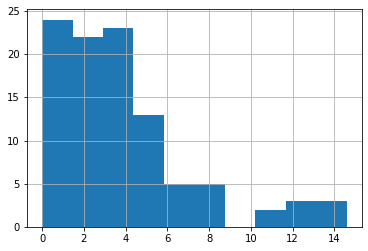

In [7]:
p3df = pd.read_csv('data/sample.csv')
p3df.Sample.hist()

### Нарисуем несколько распределений на QQ графике:

* нормальное
* лапласа
* экспоненциальное
* усеченное экспоненциальное
* логнормальное


In [8]:
def tester(data_column, distr):
    intervals = np.linspace(min(data_column), max(data_column),31)
    expected = []
    observed = []

    distr_params = distr.fit(data_column)
    for i in range(1,len(intervals)):
        observed.append(len(data_column[(data_column < intervals[i]) & (data_column >= intervals[i-1])]))
        expected.append((distr.cdf(intervals[i], *distr_params) - distr.cdf(intervals[i-1], *distr_params))*len(data_column))

    return(chisquare(observed, expected, ddof = 2))


Power_divergenceResult(statistic=117.14971094153768, pvalue=3.3600532147626343e-13)


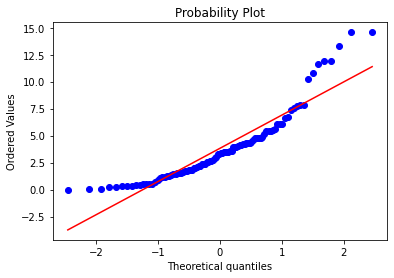

In [9]:
p = stats.probplot(p3df.Sample, dist="norm", plot = plt)
print(tester(p3df.Sample, norm))

Power_divergenceResult(statistic=91.83541388595273, pvalue=5.4116375173574415e-09)


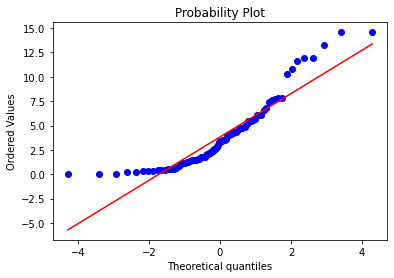

In [10]:
r = stats.probplot(p3df.Sample, dist=stats.laplace, plot = plt)
print(tester(p3df.Sample, stats.laplace))

Power_divergenceResult(statistic=48.49582004857258, pvalue=0.006755398417453978)


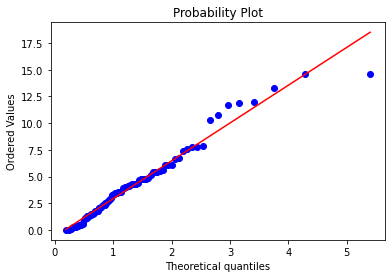

In [11]:
s, loc1, scale1 = stats.lognorm.fit(p3df.Sample)

r = stats.probplot(p3df.Sample, dist=stats.lognorm(s), plot = plt)
print(tester(p3df.Sample, stats.lognorm))

Power_divergenceResult(statistic=43.50646477710356, pvalue=0.02323759873740911)


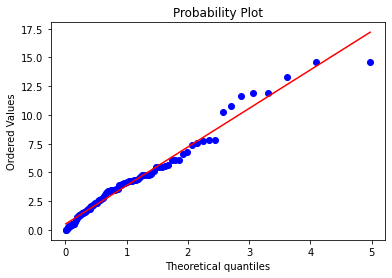

In [12]:
r = stats.probplot(p3df.Sample, dist=stats.expon, plot = plt)
print(tester(p3df.Sample, stats.expon))

Power_divergenceResult(statistic=54.11366770459223, pvalue=0.0014734639445013512)


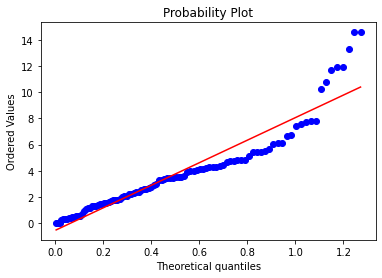

In [13]:
b1, loc1, scale1 = stats.truncexpon.fit(p3df.Sample)
r = stats.probplot(p3df.Sample, dist=stats.truncexpon(b=b1), plot = plt)
print(tester(p3df.Sample, stats.truncexpon))

### Вывод по типу распределений:
Для всех сделаем Хиквадрат тест, увидем, что на уровне значимости 1%, только для экспоненциального распределения не отвергается гипотеза о том, что выборка принадлежит этому распределению.

# Задание 4
В файлеanorexia.txtзаписан вес пациентов до начала терапии ано-рексии и после ее окончания. Была ли терапия в эффективна?

Считаем эти данные, поправив нестандартный разделитель.

In [14]:
anorexia = pd.read_csv("data/anorexia.txt", delimiter='\t')
anorexia.describe()

,Before,After
count,29.000000,29.000000
mean,82.689655,85.696552
std,4.845495,8.351924
min,70.000000,71.300000
25%,80.400000,81.900000
50%,82.600000,83.900000
75%,85.000000,90.900000
max,94.900000,103.600000


## t-test
сделаем т-тест на зависимых выборках

Для этого задания корректно будет попарный t-test так как нас интересует есть ли в среднем для каждого человека разница в показателе.

In [15]:
stats.ttest_rel(anorexia.Before, anorexia.After)

Ttest_relResult(statistic=-2.215587843931166, pvalue=0.03502259756218883)

In [16]:
(anorexia.After - anorexia.Before).mean()

3.006896551724138

Мы получили pvalue = 0.035, на 1% уровне значимости мы не можем отвергнуть нулевую гипотезу о том, что разницы между началом и концом терапии нет. Если бы мы взяли 5% уровень значимости, то могли отвергнуть гипотезу о неэффективности терапии. А так как вес в среднем для наблюдаемого вырос, то мы могли бы говорить о том, что эффект отличается от нулевого в нужную сторону.

## знаковый критерий уилкоксона
проверим гипотезу о разнице эффекта от терапии 0

In [17]:
stats.wilcoxon(anorexia.Before, anorexia.After)

WilcoxonResult(statistic=131.5, pvalue=0.06291972262602667)

In [18]:
stats.wilcoxon(anorexia.After, anorexia.Before, alternative="greater")

WilcoxonResult(statistic=303.5, pvalue=0.031459861313013336)

## тест на знаки

In [19]:
sign_test(anorexia.Before, anorexia.After)

(-3.5, 0.26493089646101)

Для непараметрического теста Уилкоксона и теста на знаки, получаем похожую ситуацию, только значения pvalue иные. Для двухстороннего теста нельзя утверждать, что есть отличия медианы разницы (и следовательно эффекта) от нуля. Для альтернативы "До теста было выше",  pvalue ниже и можно говорить, что на 5% уровне значимости у этой терапии есть эффект. На 1% уровне значимости - нет.

# Задание 5
В файлеseattle.txtзаписаны цены на недвижимость в одном из рай-онов Сиэтла в 2001 году и в 2002 году (объекты недвижимости выбирались случайно). Изменилисьли в среднем цены в этом районе за год?

In [20]:
seattle = pd.read_csv('data/seattle.txt', delimiter='\t')
seattle

,Price,Year
0,142.0,2002
1,232.0,2002
2,132.5,2002
3,200.0,2002
4,362.0,2002
...,...,...
95,239.0,2001
96,710.0,2001
97,172.0,2001
98,228.5,2001


In [21]:
seattle.groupby('Year').mean()

,Price
Year,
2001,288.92654
2002,329.25714


Year
2001    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
2002    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

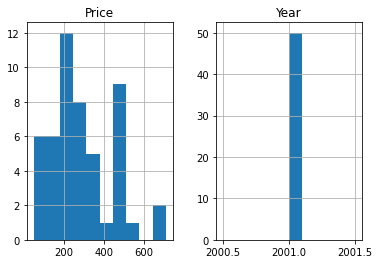

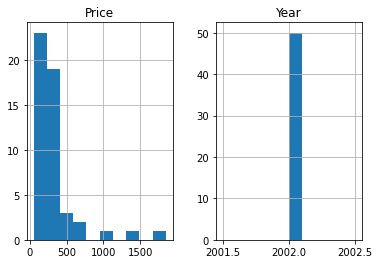

In [22]:
seattle.groupby('Year').hist()

In [23]:
seattle.groupby('Year').describe()

Price                                                                
     count       mean         std   min     25%      50%       75%     max
Year                                                                      
2001  50.0  288.92654  157.777757  50.0  190.25  260.800  406.7375   710.0
2002  50.0  329.25714  316.830045  50.0  176.20  244.925  328.6250  1850.0

Среднее значение выше в 2002 году, но также и стандартное отклонение в 2 раза выше, а мода распределения ниже.

In [24]:
pr2001 = seattle[seattle.Year == 2001].Price
pr2002 = seattle[seattle.Year == 2002].Price


## т тест для неравных дисперсий

T-test для неравных дисперсий:
Вывод - гипотеза о равенстве средних не отвергается на 1% и 5% уровне значимости

In [25]:
stats.ttest_ind_from_stats(mean1=pr2001.mean(), std1=np.std(pr2001), nobs1=len(pr2001),
                            mean2=pr2002.mean(), std2=np.std(pr2002), nobs2=len(pr2002))

Ttest_indResult(statistic=-0.8139060403365842, pvalue=0.4176720088127156)

## Критерий колмогорова смирнова
Проверяем гипоетзу о равестве распределения цен в 2 года

In [26]:
stats.ks_2samp(pr2001, pr2002)

KstestResult(statistic=0.14, pvalue=0.7166468440414822)

Проверяем гипотезу о сдвиге распределений между годами

In [27]:
stats.mannwhitneyu(pr2001, pr2002)

MannwhitneyuResult(statistic=1204.5, pvalue=0.3781936337850874)

По всем тестам, мы не можем отвергнуть гипотезу о том, что 2001 год и 2002 год имеют неотличимые между собой цены.

# Задание 6
В рамках исследования эффективности препарата метилфенидат па-циенты с синдромом дефицита внимания и гиперактивности в течение недели принимали либо ме-тилфенидат, либо плацебо. В конце недели каждый пациент проходили тест на способность к по-давлению импульсивных поведенческих реакций. На втором этапе плацебо и препарат менялись, ипосле недельного курса каждый испытуемые проходили второй тест. Был ли эффект от примененияпрепарата? Данные находятся в файле methylphenidate.txt

In [28]:
drugtest = pd.read_csv("data/methylphenidate.txt", delimiter=' ')

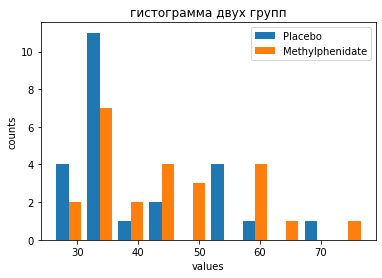

In [29]:
fig, ax = plt.subplots()
ax.hist(drugtest, label=drugtest.columns)
ax.legend()


ax.set_xlabel('values')
ax.set_ylabel('counts')
ax.set_title('гистограмма двух групп')
plt.show()

In [30]:
drugtest.describe()

,Placebo,Methylphenidate
count,24.000000,24.000000
mean,39.750000,44.708333
std,11.314669,12.319935
min,26.000000,29.000000
25%,33.000000,35.000000
50%,36.000000,42.500000
75%,44.500000,52.500000
max,71.000000,77.000000


сделаем тест на равенство дисперсий, чтобы уточнить, можно ли использовать такое предположение для тестов на равенство средних:

In [31]:
stats.levene(drugtest.Placebo, drugtest.Methylphenidate)

LeveneResult(statistic=0.6951197821893255, pvalue=0.40873698568514094)

In [32]:
stats.ttest_ind(drugtest.Placebo, drugtest.Methylphenidate)

Ttest_indResult(statistic=-1.452163501815909, pvalue=0.1532433046938409)

мы не отвергаем гипотезу о равенстве дисперсий, поэтому можем провести тест на разницу средних, используя равную дисперсию. Тест выдает 0,15 pvalue - мы не можем на 1 и 5% отвергать гипотезу о равенстве средних в двух тестовых группах

## Критерий колмогорова смирнова
Проверяем гипоетзу о равестве распределения цен в 2 года


In [33]:
stats.ks_2samp(drugtest.Placebo, drugtest.Methylphenidate)

KstestResult(statistic=0.25, pvalue=0.4490368220409109)

## Mann-Whitney тест
Проверяем гипотезу о сдвиге распределений между годами


In [34]:
stats.mannwhitneyu(drugtest.Placebo, drugtest.Methylphenidate)


MannwhitneyuResult(statistic=206.0, pvalue=0.04609734480136829)

На основе непараметрических тестов ситуация не меняется кроме теста Манна-Уитни. На его основании, мы могли бы говорить о том, что эффект применения есть на уровне значимости 5%. Для 1% уровня значимости нельзя сказать, что эффект от препарата был.

# Задание 7
В файле mtcars.csv находятся данные из американского журналаMotor Trend 1974 года. Они описывают расход топлива в зависимости от 10 характеристик автомо-биля (все автомобили 1973-1974 года
Влияет ли тип двигателя на расход топлива? А тип коробки передач?


In [35]:
mtcars = pd.read_csv('data/mtcars.csv', index_col=0)
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


## Решим задачу в ключе - какой эффект от этих переменных, при условии что все остальные неизменны
Для этого построим линейную регрессию и посмотрим на значимость коээфициентов при интересующих нас переменных

In [36]:
import statsmodels.formula.api as smf

m1 = smf.ols('mpg ~ cyl + disp + hp + drat + wt + qsec + vs + am + gear + carb', data=mtcars)
m1fitted = m1.fit()

print(m1fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Sat, 31 Jul 2021   Prob (F-statistic):           3.79e-07
Time:                        18:06:15   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3034     18.718      0.657      0.5

In [37]:
m1fitted.f_test("vs = am = 0")


<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[0.75668509]]), p=0.4815897287884093, df_denom=21, df_num=2>

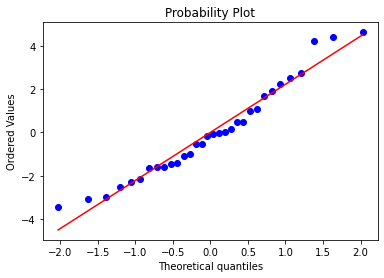

In [38]:

f = stats.probplot(m1fitted.resid, dist="norm", plot = plt)

### вывод
Тест Jarque-Bera на нормальность остатков и из визуальный анализ указывает, что гипотезу о их нормальном распределении отвергнуть нельзя.
Следовательно, можно говорить о том, что мы можем смотеть на выводы по значимости факторов

Как отдельно, так и вместе факторы типа двигателя и трансмиссии не вляют на экономичность авто, на этих данных, а влияет вес, объем и можность двигателя (воспользуемся случайным лесом ниже, чтобы вытащить относительную значимость факторов)

In [39]:
regr = RandomForestRegressor( random_state=0)
regr.fit(mtcars.loc[:, mtcars.columns != 'mpg'], mtcars.mpg)

RandomForestRegressor(random_state=0)

In [85]:
pd.DataFrame(zip(regr.feature_importances_, mtcars.loc[:, mtcars.columns != 'mpg'].columns)).sort_values(by=0, ascending=False)

,0,1
4,0.359465,wt
1,0.237888,disp
2,0.235446,hp
0,0.120737,cyl
3,0.020585,drat
5,0.017880,qsec
9,0.004081,carb
8,0.002131,gear
6,0.001393,vs
7,0.000394,am


## Решим задачу в ключе - какой эффект отдельно от типа двигателя и трансмиссии, без контроля остальных парамтеров.
Сделаем t-test и непараметрические тесты

In [72]:
mtcars.groupby('vs').mean()

,mpg,cyl,disp,hp,drat,wt,qsec,am,gear,carb
vs,,,,,,,,,,
0,16.616667,7.444444,307.150000,189.722222,3.392222,3.688556,16.693889,0.333333,3.555556,3.611111
1,24.557143,4.571429,132.457143,91.357143,3.859286,2.611286,19.333571,0.500000,3.857143,1.785714


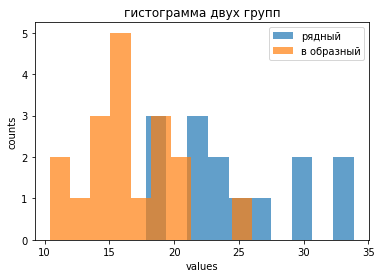

In [40]:
fig, ax = plt.subplots()
ax.hist(mtcars[mtcars.vs == 1].mpg, label='рядный', alpha = 0.7)
ax.hist(mtcars[mtcars.vs == 0].mpg, label='в образный', alpha = 0.7)

ax.legend()


ax.set_xlabel('values')
ax.set_ylabel('counts')
ax.set_title('гистограмма двух групп')
plt.show()

Ожидаем, что разница будет

In [41]:
stats.ttest_ind(mtcars[mtcars.vs == 0].mpg, mtcars[mtcars.vs != 0].mpg)

Ttest_indResult(statistic=-4.864384956122782, pvalue=3.415937254419951e-05)

In [42]:
stats.ks_2samp(mtcars[mtcars.vs == 0].mpg, mtcars[mtcars.vs != 0].mpg)


KstestResult(statistic=0.7301587301587301, pvalue=0.0001328071108758211)

In [43]:
stats.mannwhitneyu(mtcars[mtcars.vs == 0].mpg, mtcars[mtcars.vs != 0].mpg)

MannwhitneyuResult(statistic=22.5, pvalue=4.517235850026591e-05)

По всем тестам, мы можем отвергнуть гипотезу о равенстве расхода на 1% уровне значимости. Так как расход в американских милях на галлон - чем выше число, тем экономичнее машина.

У машин с рядными двигателями получается, что экономичность выше.

#### для коробок передач

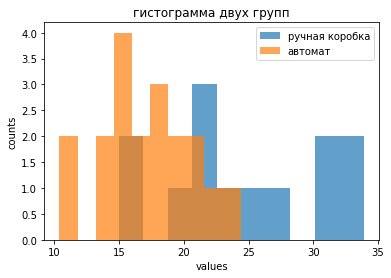

In [44]:
fig, ax = plt.subplots()
ax.hist(mtcars[mtcars.am == 1].mpg, label='ручная коробка', alpha = 0.7)
ax.hist(mtcars[mtcars.am == 0].mpg, label='автомат', alpha = 0.7)

ax.legend()


ax.set_xlabel('values')
ax.set_ylabel('counts')
ax.set_title('гистограмма двух групп')
plt.show()

In [45]:
stats.ttest_ind(mtcars[mtcars.am == 0].mpg, mtcars[mtcars.am != 0].mpg)


Ttest_indResult(statistic=-4.106126983100689, pvalue=0.0002850207439350686)

In [46]:
stats.ks_2samp(mtcars[mtcars.am == 0].mpg, mtcars[mtcars.am != 0].mpg)


KstestResult(statistic=0.6356275303643725, pvalue=0.00194012440784197)

In [47]:
stats.mannwhitneyu(mtcars[mtcars.am == 0].mpg, mtcars[mtcars.am != 0].mpg)


MannwhitneyuResult(statistic=42.0, pvalue=0.0009356956665892771)

# выводы
* Отдельно рассматривая, мы нашли значимую разницу - машины с рядным двигателем и машины с ручной коробкой экономичнее.
* Однако, принимая все переменные во внимание, видно что тип двигателя и коробки стоят на последнем  и предпоследнем месте по значимости влияния на расход топлива.
* Сильнее всего влияют вес, мощность и объем двигателя, а рядные двигатели и ручные коробки передач встречались в наших данных у легких и маломощных автомобилей в среднем.